<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="mobile.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>DISEASE PREDICTION HEART DISEASE
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## PROBLEM STATEMENT

Statement : Heart Disease Prediction Using Machine Learning
Heart disease remains one of the leading causes of mortality worldwide, with early detection being crucial for effective treatment and prevention. However, predicting heart disease based on traditional risk factors and clinical assessments can be challenging due to the complexity of the condition and the variability of symptoms among patients.


Description: The aim of this project is to develop a machine learning model that can accurately predict the likelihood of heart disease in patients using a combination of demographic, clinical, and lifestyle data. The model should assist healthcare providers in identifying high-risk individuals for early intervention, ultimately reducing the incidence of heart attacks, strokes, and related complications.

<a id='import_lib'></a>
# 1. Import Libraries

In [8]:
pip install matplotlib


In [9]:
pip install seaborn

In [10]:
import numpy as np
import pandas as pd


# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns



In [11]:
pip install pandas

In [12]:
pip install numpy

<a id='RD'></a>
# 2. Read Data

In [13]:
# read csv file using pandas
df_heart = pd.read_csv("D:/SRM/heart new.csv")

# display the top 5 rows of the dataframe
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0,125,212.0,0,1.0,168.0,0,1.0,2.0,2,3,0.0
1,53,1.0,0,140,203.0,1,0.0,155.0,1,3.1,0.0,0,3,0.0
2,70,1.0,0,145,174.0,0,1.0,125.0,1,2.6,0.0,0,3,0.0
3,61,1.0,0,148,203.0,0,1.0,161.0,0,0.0,2.0,1,3,0.0
4,62,NaN,0,138,294.0,1,1.0,106.0,0,1.9,1.0,3,2,0.0


In [14]:
df_heart.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1.0,0,128,216.0,0,0.0,131.0,1,2.2,1.0,3,3,0.0
1016,65,1.0,3,138,282.0,1,0.0,174.0,0,1.4,1.0,1,2,0.0
1017,53,1.0,0,123,282.0,0,1.0,95.0,1,2.0,1.0,2,3,0.0
1018,41,1.0,0,110,172.0,0,0.0,158.0,0,0.0,2.0,0,3,0.0
1019,47,1.0,0,112,204.0,0,1.0,143.0,0,0.1,2.0,0,2,1.0
1020,59,1.0,1,140,221.0,0,1.0,164.0,1,0.0,2.0,0,2,1.0
1021,60,1.0,0,125,258.0,0,0.0,141.0,1,2.8,1.0,1,3,0.0
1022,47,1.0,0,110,275.0,0,0.0,118.0,1,1.0,1.0,1,2,0.0
1023,50,0.0,0,110,254.0,0,0.0,159.0,0,0.0,2.0,0,2,1.0
1024,54,1.0,0,120,188.0,0,1.0,113.0,0,1.4,1.0,1,3,0.0


#### Dimensions of the data


In [15]:
# 'shape' function gives the total number of rows and columns in the data
df_heart.shape

(1025, 14)

<a id='data_preparation'></a>
# 3. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 3.1 Understand the Dataset

<a id='Data_Types'></a>
### 3.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

**1. Check for the data type**

In [16]:
# 'dtypes' gives the data type for each column
df_heart.dtypes

age           int64
sex         float64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
target      float64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, it is clear that the data type of all the variables except 'sex' 'cholestrol' 'restecg''old peak' and 'm_dep' is float. The data type of 'clock_speed' and 'm_dep' is int64.<br><br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


**2. Display all the columns**

In [17]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**3. Displaying all the Null values**

In [18]:
df_heart.isnull().sum()

age          0
sex          2
cp           0
trestbps     0
chol         5
fbs          0
restecg      6
thalach     10
exang        0
oldpeak      6
slope        2
ca           0
thal         0
target       5
dtype: int64

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

In [19]:
# splitting features and the target variable
# consider all the columns except 'RGD' using 'iloc'
df_features = df_heart.iloc[:, df_heart.columns != 'target']

# consider the target variable
df_target = df_heart.iloc[:, df_heart.columns == 'target']

In [20]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_target.describe

<bound method NDFrame.describe of       target
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
1020     1.0
1021     0.0
1022     0.0
1023     1.0
1024     0.0

[1025 rows x 1 columns]>

**1. For numerical variables, use the describe()**

In [21]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1023.000000,1025.000000,1025.000000,1020.000000,1025.000000,1019.000000,1015.000000,1025.000000,1019.000000,1023.000000,1025.000000,1025.000000
mean,54.434146,0.696970,0.942439,131.611707,246.088235,0.149268,0.528950,149.065025,0.336585,1.072130,1.387097,0.754146,2.323902
std,9.072290,0.459793,1.029641,17.516718,51.645581,0.356527,0.528087,22.850248,0.472772,1.174788,0.616719,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


<a id='distribution_variables'></a>
### 3.1.3 Distribution of Variables

#### 1. Distribution of numeric independent variables.

##For the independent numeric variables, we plot the histogram to check the distribution of the variables.

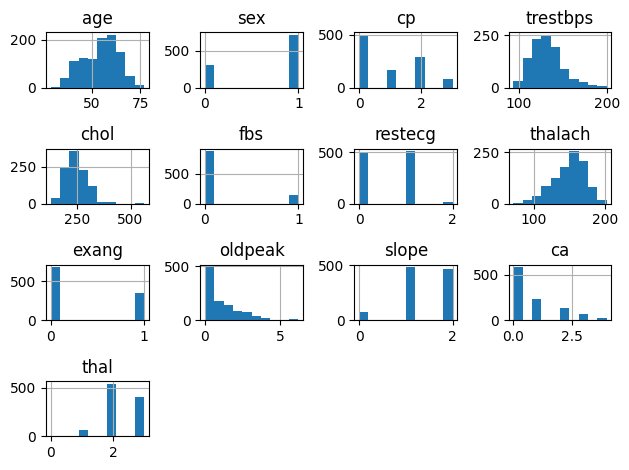

In [22]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

In [23]:
import os

# Check current working directory to ensure we know where to look for the CSV file
print("Current working directory:", os.getcwd())



Current working directory: c:\Users\singh\OneDrive\Desktop


In [31]:
class_frequency = df_heart.age.value_counts()
class_frequency

age
58    68
57    57
54    53
59    46
52    43
56    39
51    39
62    37
60    37
44    36
64    34
41    32
63    32
61    31
67    31
55    30
65    27
42    26
43    26
53    26
45    25
66    25
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
71    11
40    11
69     9
34     6
37     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64

In [32]:
class_frequency = df_heart.chol.value_counts()
class_frequency

chol
204.0    21
234.0    21
197.0    19
212.0    18
254.0    17
         ..
290.0     3
178.0     3
195.0     3
141.0     3
168.0     2
Name: count, Length: 152, dtype: int64

KeyError: 0

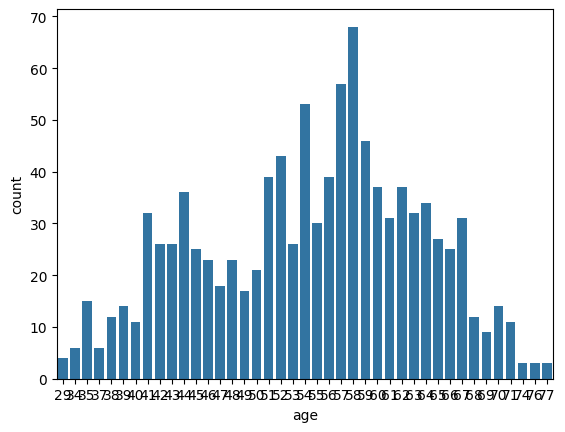

In [54]:
# plot the countplot of the variable 'price_range'
sns.countplot(x = df_heart.age)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -10.05, y = df_heart.age.value_counts()[0], s = str((class_frequency[0])*100/len(df_heart.age)) + '%')
plt.text(x = 10.95, y = df_heart.age.value_counts()[1], s = str((class_frequency[1])*100/len(df_heart.age)) + '%')
plt.text(x = 10.95, y = df_heart.age.value_counts()[2], s = str((class_frequency[2])*100/len(df_heart.age)) + '%')
plt.text(x = 10.95, y = df_heart.age.value_counts()[3], s = str((class_frequency[3])*100/len(df_target.age)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (age)', fontsize = 10)
plt.xlabel('Target Variable', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

# to show the plot
plt.show()

In [34]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Check current working directory to ensure we know where to look for the CSV file
print("Current working directory:", os.getcwd())




Current working directory: c:\Users\singh\OneDrive\Desktop


In [37]:
# create a barplot for sex and range
sns.barplot('sex', 'age', data=df_heart)

TypeError: barplot() got multiple values for argument 'data'

<a id='correlation'></a>
### 4. Correlation

In [38]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df_features.corr()

# print the correlation matrix
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.101696,-0.071966,0.271121,0.221047,0.121243,-0.134005,-0.385995,0.088163,0.205658,-0.172689,0.271551,0.072297
sex,-0.101696,1.000000,-0.042502,-0.078247,-0.196115,0.034526,-0.054826,-0.053767,0.137427,0.080267,-0.024418,0.117356,0.197375
cp,-0.071966,-0.042502,1.000000,0.038177,-0.079454,0.079294,0.042030,0.303195,-0.401513,-0.170613,0.133803,-0.176206,-0.163341
trestbps,0.271121,-0.078247,0.038177,1.000000,0.130611,0.181767,-0.124523,-0.032089,0.061197,0.182898,-0.122236,0.104554,0.059276
chol,0.221047,-0.196115,-0.079454,0.130611,1.000000,0.026645,-0.145831,-0.017174,0.065226,0.061352,-0.011926,0.072657,0.099789
fbs,0.121243,0.034526,0.079294,0.181767,0.026645,1.000000,-0.101248,-0.011615,0.049261,0.009469,-0.057242,0.137156,-0.042177
restecg,-0.134005,-0.054826,0.042030,-0.124523,-0.145831,-0.101248,1.000000,0.055390,-0.064643,-0.050323,0.088802,-0.084372,-0.023879
thalach,-0.385995,-0.053767,0.303195,-0.032089,-0.017174,-0.011615,0.055390,1.000000,-0.373192,-0.351509,0.397085,-0.203121,-0.094085
exang,0.088163,0.137427,-0.401513,0.061197,0.065226,0.049261,-0.064643,-0.373192,1.000000,0.307314,-0.269076,0.107849,0.197201
oldpeak,0.205658,0.080267,-0.170613,0.182898,0.061352,0.009469,-0.050323,-0.351509,0.307314,1.000000,-0.578342,0.223467,0.197994


A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

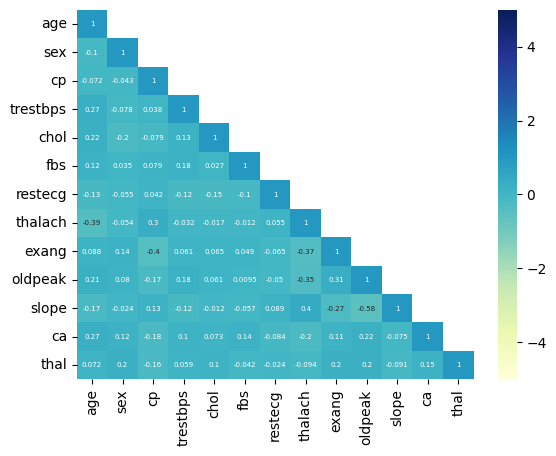

In [50]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 5.0, vmin = -5.0, annot = True, annot_kws = {"size": 5}, mask = mask)

# display the plot
plt.show()

<a id='outliers'></a>
### 4.1 Discover Outliers 

**1. Plot the boxplot for numeric data**

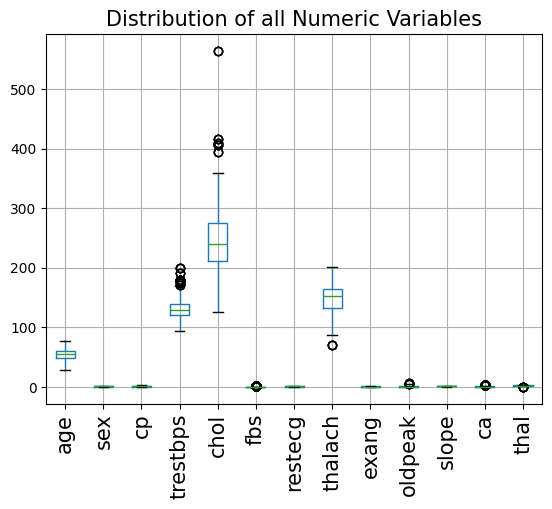

In [44]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

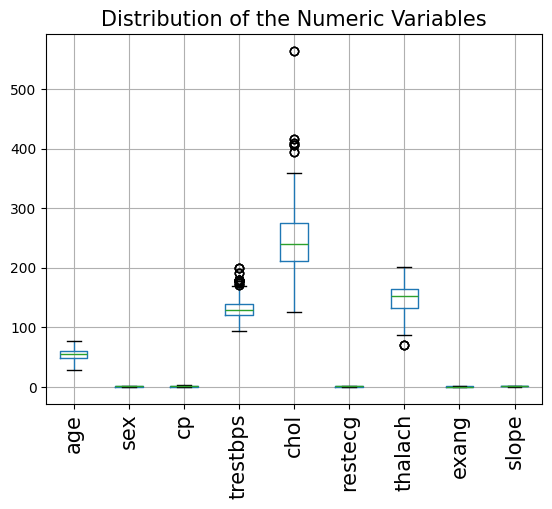

In [45]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.drop(['fbs', 'oldpeak', 'ca', 'thal',], axis = 1).boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of the Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

#### Some boxplots of variables are not seen because of the extreme values im other variables. So let's plot a separate boxplot for these variables